Importing Dependencies and Data

In [3]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#create dataframe from csv
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Exploratory Analysis

use pandas drop_duplicates to drop the duplicate rows

In [4]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]
print(df.shape)

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


Using regular expressions, it is easy to clean the text using a loop

In [5]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
        
df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


Stop words are the most common words like “the” and “of.” Removing them from the email text allows the more relevant frequent words to stand out.

In [6]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

Construct the Word Could

In [7]:
pip install wordcloud

When constructing the word cloud, it is possible to set several parameters like height and width, stop words, and max words. It is even possible to shape it instead of displaying the default rectangle.

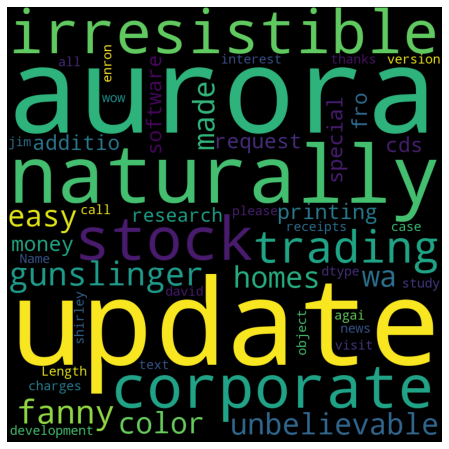

In [9]:
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

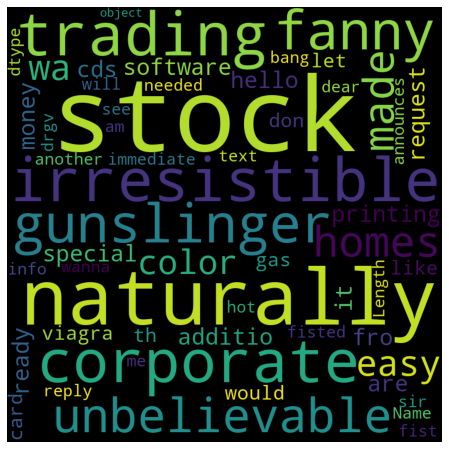

In [10]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

2.Project 2 -SPam detection


Import Dependencies

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

Transforming Text to Numbers

tokenization. It is the process of breaking down a sentence into the individual words. The individual words are called tokens.

Using SciKit-Learn’s CountVectorizer(), it is easy to transform the body of text into a sparse matrix of numbers that the computer can pass to machine learning algorithms. To simplify the concept of count vectorization

In [12]:
#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

# tokenize and build vocab
cv.fit(text)

# summarize
print(cv.vocabulary_)

# encode document
vector = cv.transform(text)

# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


Bag of Words Method Because the model doesn’t take word placement into account, and instead mixes the words up as if they were tiles in a scrabble game, this is called the bag of words method. I am going to create the sparse matrix, then split the data using sk-learn train_test_split().

In [13]:

from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer().fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

from sklearn import ensemble 
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #controls rate at which additional decision trees influes overall prediction
    max_depth = 6, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)


Generate Predictions

Finally, we fit the data, call predict and generate the classification report. Using classification_report(), it is easy to build a text report showing the main classification metrics.

In [14]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.91      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



Notice our model achieved 97% accuracy

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00       731

    accuracy                           1.00      3132
   macro avg       1.00      1.00      1.00      3132
weighted avg       1.00      1.00      1.00      3132

Confusion Matrix: 
 [[2401    0]
 [   0  731]]

Accuracy:  1.0


In [20]:

pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.91      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563

Confusion Matrix: 
 [[1913   13]
 [  59  578]]

Accuracy:  0.9719079204057745


Project 3: Sentiment Analysis

Sentiment Analysis is also a classification problem of sorts. The text is essentially going to reflect a positive, neutral, or negative sentiment. That is referred to as the polarity of the text. It is also possible to gauge and account for the subjectivity of the text! There are a ton of great resources that cover the theory behind sentiment analysis.

out of box tool to analyze sentiment called TextBlob. I’ll use TextBlob to add sentiment columns to the DataFrame so it can be analyzed.

 TextBlob library for Python 2 and 3 tries to simplify several text processing tasks. It provides tools for classification, part-of-speech tagging, noun phrase extraction, sentiment analysis and more.

In [16]:
pip install -U textblob


Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


TextBlob Sentiment
Using the sentiment property, TextBlob returns a named tuple of the form Sentiment(polarity, subjectivity). Polarity is a float in the range [-1.0, 1.0] where -1 is the most negative and 1 is the most positive. Subjectivity is a float in the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [21]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,text,spam,tb_Pol,tb_Subj
0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581


TextBlob makes it super simple to generate a baseline sentiment score for polarity and subjectivity